#  __Machine Learning Project__
## Ensembles
The purpose of this project is to use all the Machine Learning techniques learn throught the first part of the AiCore course. Among the techniques used will be: 
The goal of this project, you should have built an entire pipeline to systematically evaluate and compare different ensembles. It should allow us to find a high performing ensembles and their relevant hyperparameters.


## Section 1. Get the wine dataset
This section will focus on 2 main points: 
- **Description**: Characteristics of the features of our data set, suspicions we have about it
- **Loading**: Uploading our datasets and prepare them in the format of input data (X) and labels (Y).

As a working file we have a csv file containing the features of different kinds of wine with a label for the quality that ranges from 3 to 8. 
### Data collection
Here we will be uploading the main file (winequality-red.csv)  and examine the first 10 rows to have an idea what we are dealing with, later on we will load the respective files for train and test datasets: 
(Help markups from [here](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) ) 

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('../DATA/winequality-red_.csv') # importing the data from the .csv file
dataset.head(10) # print the first 10 rows
#type(dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Observations, initial thoughts,  and information researched about the features
- **FIXED ACIDITY **: Most of the acids involved with wine are fixed acids with the notable exception of acetic acid [Source]( https://en.wikipedia.org/wiki/Acids_in_wine)
- **VOLATILE ACIDITY **: Then this would amount to the acetic acid involved mostly found in vinegar, if that is the case, it may have negative effects on the quality of the wine. 
- **CITRIC ACID **: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes [Source](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid)
- **RESIDUAL SUGAR **: The sugar found after fermentation. 
- **CHLORIDES **: Amount of salt in the wine.
- **FREE SULFUR DIOXIDE **: I assume this is will represent a fraction of **total sulfur dioxide**
- **TOTAL SULFUR DIOXIDE **: Sulphur dioxide is added in the winemaking process to protect the wine from oxidation and bacterial spoilage. 
- **DENSITY **: Mass/volume 
- **PH **: Measures the acidity or alkalinity of a solution on a logarithmic scale that ranges from [0-14] on which 7 is neutral, lower values are more acid and higher values more alkaline/basic. [Source](https://www.google.com/search?client=firefox-b-d&q=ph+definition). I expect a correlation with the **sulfux dioxide** features.
- **SULPHATES **: Related with sulfur dioxide molecules so I supposed there will be some sort of relationship with the **sulfur dioxide**.
- **ALCOHOL **: Amount of alcohol in %
- **QUALITY **: Our label, denoting the quality of the wine with values ranging from [3-8]


***
### Headers 
It will be useful later on to have a list of the headers, the names of the columns corresponding to each feature. 

In [31]:
headers = list(dataset.columns) #Get the headers of the dataset in an array
#type(dataset.columns)
print(headers)


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### Basic information from the data set
We have 11 features in total as described above, with  1599 data points and no empty values, thus no need of data clenaning in that regard. This database has been divided in testing and training in a respective csv file to be uploaded.
  <br> Finally we just present the range of values for each feature. This will come in handy in case we need to do feature normalization to improve our results. 
I note in particular 
- large range of variations:  **free sulfur dioxide** and **total sulfur dioxide**, [1-72] and [6-289] respectively
- mean range variations: **fixed acidity**, **residual sugar**, **pH** and **alcohol**
- small range variations: **volatile acidity**, **citric acid**, **chlorides** and **density**

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
dataset.describe().loc[["min", "max"]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8.0


### Uploading the training and testing datasets: 

Our training data set has **1279 data points** and an undesired column called "Unnamed:0" that corresponds to the original indexes from the file: winequality-red_.csv we will drop that column later. Regarding to our test data set, it containts **710 datapoints** and also the extra column "Unnamed:0". 
 <br> Note that: 710+1279=1989 which exceeds our 1599 entries from the original file: winequality-red_.csv.  I am just gonna assume that it was done so we have enough data to train and test. 


In [46]:
train_dataset = pd.read_csv('./DATA/winequality-red-train.csv') # importing the data from the .csv file
test_dataset = pd.read_csv('./DATA/winequality-red-test.csv')

#train_dataset.info() # Our data set has 1279 data points and an undesired column called "Unnamed:0" 
#test_dataset.info() #Our test data set wiht 710 datapoints and an undesired column called "Unnamed:0". 


 ### Datasets generator.
Below we will create a function that will arrange our data in array format and will get rid of unnecesary columns. Note that the *except* command is just in case we use the dataset from (winequality-red_.csv) which doesn't contain the column: "Unnamed:0"
<br> The function *separateXY* will 

In [313]:
from sklearn.model_selection import train_test_split

#If creating a validation set, we use this to separate inputs X from labels Y from the shuffled data.
def separateXY(full_data):
    label_column=full_data.shape[1]-1  #index of the column where the labels are located
    X=full_data[:,0:label_column]
    Y=full_data[:,label_column]
    return X, Y.astype(int)
    
#Function that generates our datasets for input features X and labels Y.
def dataset_generator(dataset, validation = False, val_size = 0.20): 
    if validation==False: 
        try:
            X = dataset.drop(["Unnamed: 0", "quality"], axis=1).to_numpy()  #drop extra columns and convert to array
            Y = dataset["quality"].to_numpy() #Convert quality dataset to array
            return X,Y.astype(int)
        except: 
            X = dataset.drop([ "quality"], axis=1).to_numpy()  #drop extra columns and convert to array
            Y = dataset["quality"].to_numpy()     #Convert quality dataset to array
            return X,Y.astype(int)
    else: 
        try:
            X = dataset.drop(["Unnamed: 0"], axis=1).to_numpy()
            train_data, val_data = train_test_split(X, test_size= val_size, shuffle=True) ## randomly split data into train and validation sets
            X_train, Y_train = separateXY(train_data)
            X_val, Y_val = separateXY(val_data)
            return X_train, Y_train, X_val, Y_val
        except:
            X = dataset.to_numpy()
            train_data, val_data = train_test_split(X, test_size= val_size, shuffle=True) ## randomly split data into train and validation sets
            X_train, Y_train = separateXY(train_data)
            X_val, Y_val = separateXY(val_data)
            return X_train, Y_train, X_val, Y_val
        
#Creating datasets
X,Y=dataset_generator(dataset)                            #original dataset
X_training, Y_training =dataset_generator(train_dataset)  #training dataset
X_test,Y_test=dataset_generator(test_dataset)             #testing dataset

#Sanity check, for dimensions and lenght of our features and labels:
print("Dimensions of X training:", X_training.shape,"\t", "Dimensions of Y training: ", Y_training.shape)
print("Lenght of X:" , len(X_training),"\t", "Length of Y" ,len(Y_training))
print("Dimensions of X test:", X_test.shape,"\t", "Dimensions of Y test: ", Y_test.shape)

Dimensions of X training: (1279, 11) 	 Dimensions of Y training:  (1279,)
Lenght of X: 1279 	 Length of Y 1279
Dimensions of X test: (710, 11) 	 Dimensions of Y test:  (710,)


### Validation and Test datasets.
Since our models will contain hyperparameters. We should subdivide our training set (X_training, Y_training) in train and validations sets, where we split our data into a 80:20 proportion. Note in our sanity check that the dimensions of our train and validations are correct and divided in the correct proportion.

In [148]:
X_train, Y_train, X_val, Y_val = dataset_generator(train_dataset, validation=True)

#Sanity check, for dimensions and lenghts of our trainig and validations sets:
print("Dimensions of X_train:", X_train.shape,"\t", "Dimensions of Y_train: ", Y_train.shape)
print("Dimensions of X_val:", X_val.shape,"\t", "Dimensions of Y_val: ", Y_val.shape)


Dimensions of X_train: (1023, 11) 	 Dimensions of Y_train:  (1023,)
Dimensions of X_val: (256, 11) 	 Dimensions of Y_val:  (256,)


### Plotting the dataset features


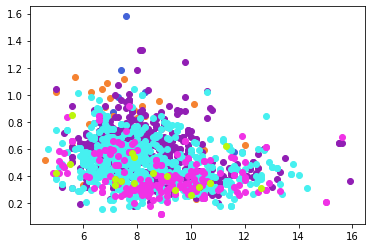

In [340]:

testX=dataset[["fixed acidity",'volatile acidity']].to_numpy()
testY=dataset['quality'].to_numpy()
#testY
import sys
sys.path.append('..')
from utils import show_data
show_data(testX,testY)


(1023, 11)


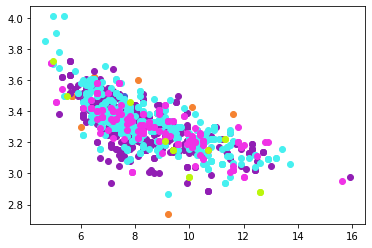

[(0, 'fixed acidity'), (1, 'volatile acidity'), (2, 'citric acid'), (3, 'residual sugar'), (4, 'chlorides'), (5, 'free sulfur dioxide'), (6, 'total sulfur dioxide'), (7, 'density'), (8, 'pH'), (9, 'sulphates'), (10, 'alcohol'), (11, 'quality')]


In [339]:
import sys
sys.path.append('..')
from utils import show_data

'''Visualising pairs of features'''
#Testing, selecting feature 0 and 8 to plot corresponding to fixed acidity and PH
print(X_train.shape)
features = X_train[:,[0,8]]                #Explore and visualise different pair of features.
show_data(features,Y_train)
#print(X[0:5,0,[10,11]])

print(list(enumerate(headers)))     #Enlist all headers


***

## Section 2: Fit models to the wine dataset and test performance

In this section we train our data with different models and evaluate their performace. We will be using *X_train* and *Y_train* as our input and labels dataset. As a reminder, *X_train* is a set with 1023 data points and 11 columns representing our features; similarly *Y_train*  is a column that also contains 1023 rows corresponding to the quality given to the wine. 

Our problems is a classification problem, where given a  the feature datapoint, our model should predict one of the six possible values of quality from the values: [3,4,...,8]


In [149]:
print("Dimensions of X_train:", X_train.shape,"\t", "Dimensions of Y_train: ", Y_train.shape)


Dimensions of X_train: (1023, 11) 	 Dimensions of Y_train:  (1023,)


## Model 1: K means clustering
Considering the values of the Quality for the wine are [3,4,...,8], the number of possible classes to predict are 6. 

In [315]:
#Model 1: K means clustering
from sklearn.cluster import KMeans ## import kmeans model from sklearn
from sklearn.preprocessing import scale
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans = KMeans(n_clusters=6, n_init=10, init='k-means++') ## init k means with a given number of centroids
kmeans.fit(scale(X_train), Y_train) ## fit
predictions = kmeans.predict(scale(X_train)) ## make predictions
print("List of predictions:",predictions)
print("List of labels:",Y_train)
print("Range of values for new labels:",set(kmeans.labels_))

List of predictions: [0 5 4 ... 3 3 3]
List of labels: [6 6 5 ... 5 5 6]
Range of values for new labels: {0, 1, 2, 3, 4, 5}


The problem we have now is that our predicted labels run from [0,5] and we don't know which label corresponds to our original labels from [3,8] it can be 5! possibilities! Thus we selected the following metrics: 

### Completeness:  metric of a cluster labeling given a ground truth.
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.     Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling. In other words, measurs if the datapoints belonging to a class (lets say quality=8) end up clustered together after running the model. 



### Homogeneity: metric of a cluster labeling given a ground truth.
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.     Score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling



### The V-measure:  Is the harmonic mean between homogeneity and completeness.     
Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling


In [319]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score,v_measure_score

print("Homogeneity: %0.3f" % homogeneity_score(Y_train, predictions))
print("Completeness: %0.3f" % completeness_score(Y_train, predictions))
print("V-measure: %0.3f" % v_measure_score(Y_train, predictions))


Homogeneity: 0.108
Completeness: 0.080
V-measure: 0.092


Evaluating our model with the test dataset:

In [329]:
predictions_test = kmeans.predict(scale(X_test))
predictions_test.shape
Y_test.shape
print("Homogeneity: %0.3f" % homogeneity_score(Y_test, predictions_test))
print("Completeness: %0.3f" % completeness_score(Y_test, predictions_test))
print("V-measure: %0.3f" % v_measure_score(Y_test, predictions_test))

Homogeneity: 0.138
Completeness: 0.102
V-measure: 0.118


So far the most we are getting is around 10% accuracy. We will keep exploring other methods. Note: we used .scale() method, on X_train to standarize our features giving them mean=0 and standar deviation =1.  ( before that our metrics where: Homogeneity: 0.054, Completeness: 0.044, V-measure: 0.049)


In [230]:
#print("mean:", scale(X_train).mean(axis=0).astype(int), "standard deviation: ",scale(X_train).std(axis=0))

mean: [0 0 0 0 0 0 0 0 0 0 0] standard deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In the following we just present a visualization of our predictions using Principal Component Analysis in order to be able to show them in 2 dimension. The source of this particular code is [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

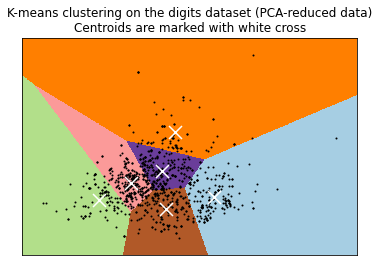

In [233]:
# #############################################################################
# Visualize the results on PCA-reduced data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
reduced_data = PCA(n_components=2).fit_transform(scale(X_train))
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Model 2: Classification trees


54.54545454545455
55.71847507331378
60.80156402737048
62.365591397849464
69.20821114369501
75.46432062561095
80.64516129032258
83.57771260997067
87.29227761485826
90.71358748778104
93.25513196480938
94.42815249266862
96.08993157380255
97.0674486803519
98.04496578690127
98.9247311827957
99.21798631476051
99.60899315738025
99.60899315738025
99.90224828934507
100.0
100.0
100.0
100.0


'Conclusion: Need to avoid overfitting: tune hyperparameter'

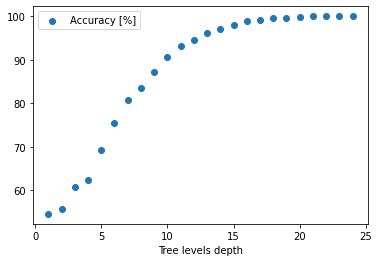

In [308]:
#Model 2: Classification trees
import sklearn.tree
from utils import show_data, visualise_predictions, colors, calc_accuracy
import matplotlib.pyplot as plt
tree_levels=range(1,25) #testing diff tree levels
accuracy_list = [] #zeros(range(1,12))
for max_depth in tree_levels:
    classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
    classificationTree.fit(X_train, Y_train)
    classificationTree.predict(X_train)


    correct_predictions_tree = np.ones(len(Y_train))
    correct_predictions_tree = correct_predictions_tree[Y_train==classificationTree.predict(X_train)]
    accuracy_tree = 100*sum(correct_predictions_tree)/len(Y_train)
    print(accuracy_tree)
    accuracy_list.append(accuracy_tree)
plt.scatter(tree_levels,accuracy_list, label="Accuracy [%]")
plt.xlabel("Tree levels depth")
#plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show
#print("Correct predictions for last tree:", 100*sum(correct_predictions_tree)/len(Y_train))


'''Conclusion: Need to avoid overfitting: tune hyperparameter'''


Evaluation:Selecting a max_depth of 12. It shows we need to adjust the max_depth and optimize over evaluation set X_eval

In [333]:

classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=12)
classificationTree.fit(X_train, Y_train)
classificationTree.predict(X_test)

classificationTree.score(X_test, Y_test)

0.5535211267605634

## Model 3: DBSCAN
We need to play with the distances (eps) and min_samples but doesn't look like it will be too accurate even with the features starndised.  The next step will be to use some optimization process to find the best hiperparameters. 


In [280]:
#Model 3 DBSCAN
import sklearn.cluster
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

DBSCAN_wines = sklearn.cluster.DBSCAN(eps=1.5,  min_samples=5).fit(scale(X_train))
labels = DBSCAN_wines.labels_
#labels2 = labels[labels!=-1] #Eliminate predictions deemed as noise
#print(labels2, len(labels2)) #predicted labels


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(Y_train, labels))
print("Completeness: %0.3f" % completeness_score(Y_train, labels))
print("V-measure: %0.3f" % v_measure_score(Y_train, labels))

Estimated number of clusters: 5
Estimated number of noise points: 292
Homogeneity: 0.026
Completeness: 0.043
V-measure: 0.033


## Model 4: Random Forest


In [334]:
#Model 4 Random Forest
from sklearn.ensemble import RandomForestClassifier
from utils import show_data, visualise_predictions, colors, calc_accuracy


randomForest = RandomForestClassifier(n_estimators=90, max_depth=7) # init random forest , max_samples=1500
randomForest.fit(scale(X_train), Y_train) # fit random forest of decision trees

score_RF=randomForest.score(scale(X_test), Y_test) # use the model's score method to compute it's accuracy

print("Score: ", score_RF)

Score:  0.6338028169014085


## Model 5 Adaboost


In [335]:
#Model 5 Adaboost
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html
import sklearn.ensemble
from utils import show_data, visualise_predictions, colors, calc_accuracy

adaBoost = sklearn.ensemble.AdaBoostClassifier(sklearn.tree.DecisionTreeClassifier(max_depth=4),n_estimators=90)
adaBoost.fit(scale(X_train), Y_train)
predictions = adaBoost.predict(scale(X_train))
print("score:", adaBoost.score(scale(X_test), Y_test))


score: 0.5450704225352113


## Model 6 KNN 


In [336]:
#Model 6 KNN
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(scale(X_train), Y_train)

#print(neigh.predict(X_train))
print("score:", neigh.score(scale(X_test), Y_test))

score: 0.571830985915493


In [ ]:
#Model 7 Xgboost (Incomplete!)
#https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface
#https://xgboost.readthedocs.io/en/latest/tutorials/model.html
import xgboost as xgb
#param={'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
#dtrain=X_train
#num_round = 2
#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtrain)
# this is prediction
#preds = bst.predict(dtrain)
#labels = dtrain.get_label()


## Section 3: Improve your performance by ensembling some  models
1. Combine the results of more than one model
2. Evaluate the performance of the ensemble

## Part 4: Write an algorithm to find the best combination of models and hyperparameters.
There are an infinite number of ways that you could combine different models with different hyperparameters, but some will perform better than others. 
1. List the different parameters which you test over, as well as the ranges which you test
2. Describe the search procedure which your algorithm implements

## Part 5: Present your results
Obviously, we need to assess your work. The final part of the project requires you to attempt to summarise your work. It should be clear how we could replicate the results by implementing exactly the same ensemble (models and hyperparameters).

1. Please try to communicate and display your results with any graphs or charts. 
2. If you have any insights into why certain ensembles or models perform better of worse than others, and would like to write a paragraph to explain this, we'd love to read it! 
3. Please also write a summary paragraph that describes the best permutation that you found.

## Part 6: 
A stakeholder asks you which features most affect the response variable (output).
Describe how you would organise a test to determine this.